Enter learning rate for logistic regression:  2.0
Enter number of iterations:  100


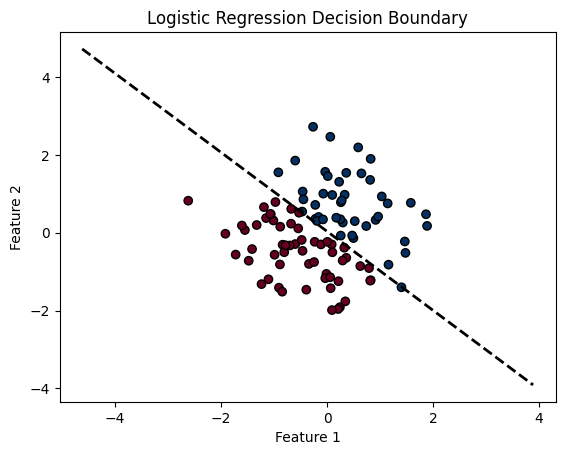

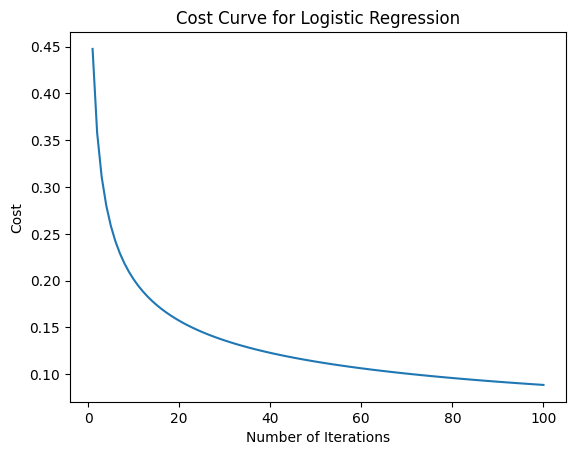

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

# Function to plot decision boundary
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
    plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
    
    plt.plot(plot_x, plot_y, color='k', linestyle='dashed', linewidth=2)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.randn(100, 2)
X = np.column_stack((np.ones(len(X)), X))  # Add a column of ones for bias
y = (X[:, 1] + X[:, 2] > 0).astype(int)

# Initialize parameters
theta = np.zeros(X.shape[1])

# Get user input for logistic regression parameters
learning_rate = float(input("Enter learning rate for logistic regression: "))
num_iterations = int(input("Enter number of iterations: "))

# Train logistic regression model
theta, costs = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Plot decision boundary
plot_decision_boundary(X, y, theta)

# Plot cost curve
plt.plot(range(1, num_iterations+1), costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost Curve for Logistic Regression")
plt.show()
